##**미니배치 경사하강법을 이용한 선형회귀**

**0. 사용할 파이썬 모듈 import, 함수 정의**

**1. Train data 쌍 (x,y) 100개 랜덤 생성**

In [2]:
import numpy as np #수학적계산을 진행해주는 라이브러리
import matplotlib.pyplot as plt #데이터 시각화를 위한 라이브러리

#미니배치 경사하강법 : 배치사이즈에 따라 일부를 사용해서 기울기 계산
#배치 경사하강법 : 전체 데이터로 기울기 계산
#확률적 경사하강법 : 전체 중 일부로 기울기 계산

In [3]:
np.random.seed(1) #실험 결과 유지 

num_sample = 100
X = 2 * np.random.rand(num_sample,1) #0~2사이 분포를갖는 100개의 샘플
y = 4 + 3* X + np.random.randn(num_sample,1) #가우시안 분포 잡음이 더해짐
X_b = np.c_[np.ones((num_sample,1)), X] #계산편리성을 위해 입력데이터 +1 // 모든 element가 1인 분포
#np.c > 첫번째 행렬에 1을 추가해줌 ( loss계산시 입력값)
X_b.shape #벡터와 메트릭스의 사이즈 체크 100 by 1 행렬 두개 합침

(100, 2)

**2. Hyperparameter, parameter 설정**

In [4]:
eta = 0.01 #학습률  한번에 얼마나 업데이트를 할지 설정
n_epoch = 500 #업데이트할때 샘플의 단위 test data set 크기
minibatch_size = 50
#minibatch의 크기 

theta_per_iterations = [] #epoch 500 mini 50 > 100번 iterations
loss_per_epoch = []

#최적의 theta를 찾는것이 목적
theta = np.random.randn(2,1)  #theta[0,0]: bias, theta[1,0]: weight

**3. 미니배치 경사하강법으로 훈련**

In [6]:
for e in range(n_epoch):  #1 epoch에 2번의 update
    shuffled_indices = np.random.permutation(num_sample) #인덱스 무작위 섞음 0~99까지의 숫자가 무작위하게 섞이게 됨
    X_b_shuffled = X_b[shuffled_indices] #x의 행들이 섞이게 됨
    y_shuffled = y[shuffled_indices] #x에 대한 레이블 값도 섞어줌
    
    for i in range(0, num_sample, minibatch_size):  #mini-batch 갯수만큼 반복 mini-batch사이즈만큼 데이터 추출 100개샘플 50미니배치> 2번반복 =1epoch에서 두번 반복
        xi = X_b_shuffled[i:i+minibatch_size] #50개에 대한 gradient계산 i=1일때 0~49번째값까지 가져옴 i=2 50~99까지
        yi = y_shuffled[i:i+minibatch_size]
        
        #추출한 데이터로 loss 계산
        loss = np.sum(((1/minibatch_size)*(xi.dot(theta)-yi))**2)#MSE (모델의 출력과 생성했던 yi값과의 차이를 제곱한 후 평균)
        #미니배치 사이즈만큼 추출했으므로 미니배치사이즈로 나눠줌
        gradients = (2/minibatch_size) * xi.T.dot(xi.dot(theta) - yi)# e=(결과값-y)^2 미분
        
        #eta: gradient가 이동하는 양
        theta = theta - eta * gradients #gradient에 대한 학습률만큼 업데이트 (train의 핵심)
        theta_per_iterations.append(theta) #theta의 변화를 보기위해 리스트에 저장

    loss_per_epoch.append(loss)

    if((e+1) % 10 == 0): #epoch 10마다 loss가 작아지는 것을 확인
      print('epoch= %05d    |    loss= %5.5g'%(e+1, loss))

epoch= 00010    |    loss= 0.23564
epoch= 00020    |    loss= 0.052469
epoch= 00030    |    loss= 0.026115
epoch= 00040    |    loss= 0.02208
epoch= 00050    |    loss= 0.021758
epoch= 00060    |    loss= 0.024858
epoch= 00070    |    loss= 0.016444
epoch= 00080    |    loss= 0.018302
epoch= 00090    |    loss= 0.018317
epoch= 00100    |    loss= 0.015869
epoch= 00110    |    loss= 0.018994
epoch= 00120    |    loss= 0.014522
epoch= 00130    |    loss= 0.019311
epoch= 00140    |    loss= 0.020831
epoch= 00150    |    loss= 0.016527
epoch= 00160    |    loss= 0.017405
epoch= 00170    |    loss= 0.014013
epoch= 00180    |    loss= 0.016435
epoch= 00190    |    loss= 0.019585
epoch= 00200    |    loss= 0.015605
epoch= 00210    |    loss= 0.012441
epoch= 00220    |    loss= 0.019776
epoch= 00230    |    loss= 0.021673
epoch= 00240    |    loss= 0.018564
epoch= 00250    |    loss= 0.016404
epoch= 00260    |    loss= 0.016686
epoch= 00270    |    loss= 0.014432
epoch= 00280    |    loss= 0.0

**4. 훈련을 거듭하며 loss, theta가 수렴되는 모습 관찰**

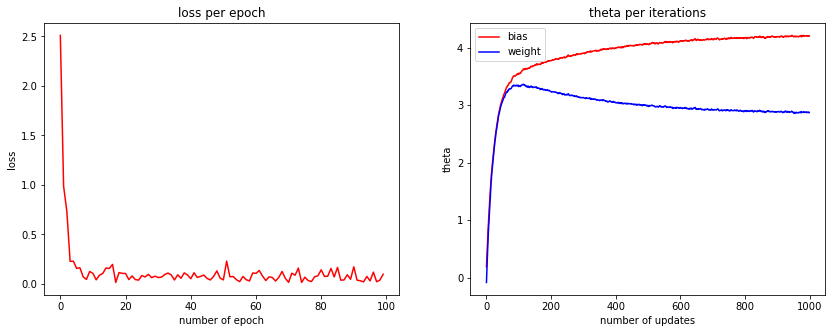

In [79]:
plt.figure(figsize=(14,5)) #띄우려는 데이터의 사이즈 정의

#4-1. loss의 수렴 관찰
plt.subplot(1,2,1) #plot두개 합침
plt.plot(loss_per_epoch, "r-") #500epoch이므로 총 500개의 epoch을 띄움

plt.xlabel('number of epoch')
plt.ylabel('loss')

plt.title('loss per epoch')

#4-2. theta의 수렴 관찰 #1000번의 업데이트 > 1000개의 값을 띄움
theta_per_iterations = np.array(theta_per_iterations)

plt.subplot(1,2,2)
plt.plot(theta_per_iterations[:,0], "r-")
plt.plot(theta_per_iterations[:,1], "b-")

plt.xlabel('number of updates')
plt.ylabel('theta')

plt.legend(['bias', 'weight'])
plt.title('theta per iterations')

plt.show()


**5. Testing (모델 시각화)**

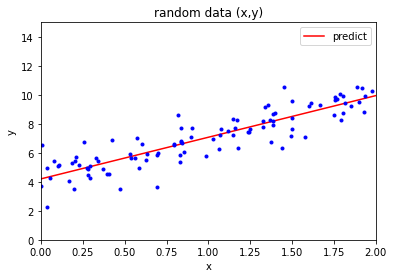

In [80]:
#새로운 데이터를 통해서 파라미터가 적절한 값인지 확인

#5-1. Test 
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta) #0~2에 따른 weigth연산에 의한 출력값

#5-2. Model 시각화
plt.plot(X_new, y_predict, "r-") #theta값을 통해 얻은 모델
plt.legend(['predict'])
plt.plot(X, y, "b.")

plt.xlabel('x')
plt.ylabel('y')
plt.title('random data (x,y)')
plt.axis([0, 2, 0, 15]) #x축의 범위와 y축의 범위를 설정
plt.show()

In [81]:
theta #노이즈가 존재하기 때문에 정확한 4,3의 weight,bias값이 나오진 않지만 유사한 값이 나오게됨

array([[4.20320564],
       [2.87140729]])

In [82]:
y_predict 

array([[4.20320564],
       [9.94602022]])